In [3]:
from sklearn.datasets import load_iris
import numpy as np
from sklearn.model_selection import train_test_split

iris_data = load_iris()

X, y = iris_data.data, iris_data.target
feature_names = np.array(iris_data.feature_names)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [4]:
feature_names

array(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)'], dtype='<U17')

In [5]:
import catboost as cb

model = cb.CatBoostClassifier(verbose=False)
model.fit(X_train, y_train)

In [6]:
from shap_selection import feature_selection

# please, use agnostic = True to use with any model...
# agnostic = False will only work with tree-based models
feature_order = feature_selection.shap_select(model, X_train, X_test, feature_names, agnostic=False)

In [13]:
type(feature_order)

tuple

In [16]:
feature_order[0]

array(['petal width (cm)', 'petal length (cm)', 'sepal length (cm)',
       'sepal width (cm)'], dtype='<U17')

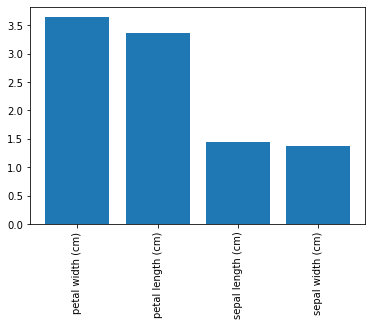

In [18]:
import matplotlib.pyplot as plt

plt.bar(feature_order[0],feature_order[1])
plt.xticks(rotation=90)
plt.show()